In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')

## Spending

In [2]:
spending = pd.read_csv('data/spending.csv')
spending

,Year,Shopping,Accommodation,F&B,"Sightseeing, Entertainment & Gaming ( SEG)",Others
0,2017,23,22,10,21,24
1,2018,20,21,10,22,27
2,2019,20,20,9,22,29
3,2020,15,21,9,20,35
4,2021,9,31,10,12,38


In [3]:
spending.set_index('Year', inplace=True)
spending

,Shopping,Accommodation,F&B,"Sightseeing, Entertainment & Gaming ( SEG)",Others
Year,,,,,
2017,23,22,10,21,24
2018,20,21,10,22,27
2019,20,20,9,22,29
2020,15,21,9,20,35
2021,9,31,10,12,38


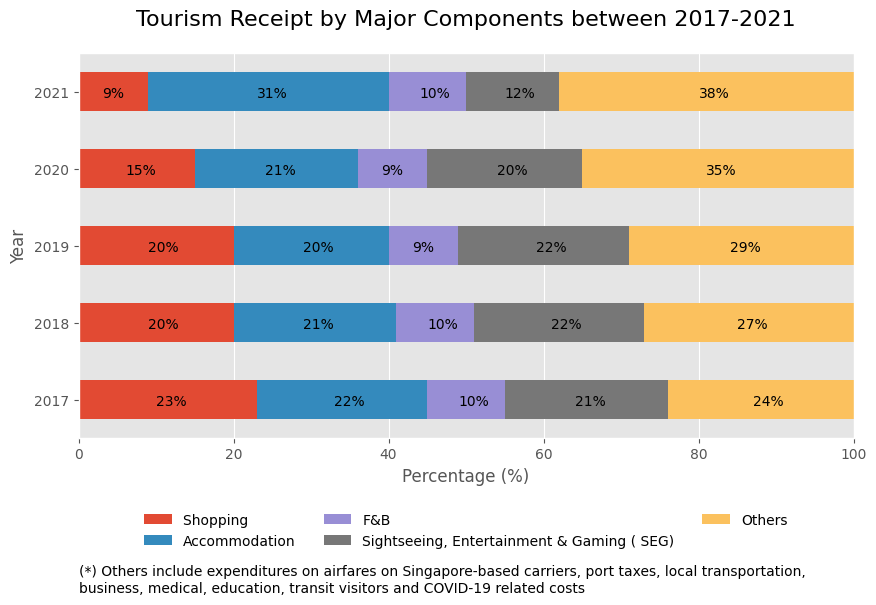

In [4]:
ax = spending.plot.barh(stacked=True, figsize=(10,5))
plt.title('Tourism Receipt by Major Components between 2017-2021', y=1.05, fontsize=16)
plt.xlabel('Percentage (%)')
plt.xlim(0,100)

plt.legend(
    bbox_to_anchor=(0.5, -0.3),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
plt.text(0,-2.5, "(*) Others include expenditures on airfares on Singapore-based carriers, port taxes, local transportation,\n" 
         + "business, medical, education, transit visitors and COVID-19 related costs")

prevx = 0
for year,row in spending.iterrows():
    xpos = 0
    rowNum = year - 2017
    for val in row:
        prevx = xpos
        xpos += val
        ax.text((prevx + xpos) // 2 - 1, rowNum -0.08, str(val) + '%', color='black')
    xpos = 0
plt.savefig('img/spending.png', bbox_inches="tight")
plt.show()

## Attractions

In [5]:
from wordcloud import WordCloud

In [6]:
fq = pd.read_csv('data/tourist.csv')
fq

,Integrated Resort (MBS/RWS),Gardens by the Bay,Sentosa,Singapore Flyer/\nFlight Experience,Singapore Zoo,Night Safari,River Safari,Jurong Bird Park,National Orchid Gardens,Orchard Road,Chinatown,Merlion Park,Little India,Esplanade Theatres by the Bay,Singapore River/ Clarke Quay/ Boat Quay,Singapore Botanic Gardens,Raffles Hotel
0,48,50,26,12,9,6,4,3,5,40,43,38,31,10,22,15,7


In [7]:
d = dict()

for c in fq.columns:
    d[c] = fq.loc[0, c]
    
d

{'Integrated Resort (MBS/RWS)': 48,
 'Gardens by the Bay': 50,
 'Sentosa': 26,
 'Singapore Flyer/\nFlight Experience': 12,
 'Singapore Zoo': 9,
 'Night Safari': 6,
 'River Safari': 4,
 'Jurong Bird Park': 3,
 'National Orchid Gardens': 5,
 'Orchard Road': 40,
 'Chinatown': 43,
 'Merlion Park': 38,
 'Little India': 31,
 'Esplanade Theatres by the Bay': 10,
 'Singapore River/ Clarke Quay/ Boat Quay': 22,
 'Singapore Botanic Gardens': 15,
 'Raffles Hotel': 7}

In [8]:
wordcloud = WordCloud()
wordcloud = WordCloud(
    background_color='white', colormap='gist_heat', relative_scaling=0.5, prefer_horizontal=0.6, min_font_size=5
).generate_from_frequencies(d)

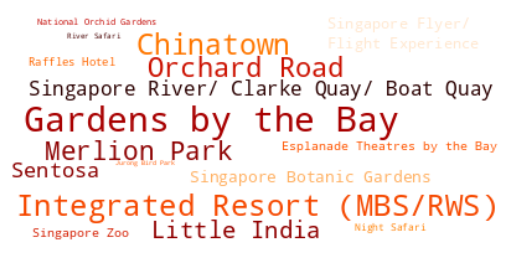

In [9]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('img/wc.png', bbox_inches='tight')
plt.show()